In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
# Define the function you want to fit (e.g., exponential, polynomial, etc.)
# def custom_function(x, param1, param2, ...):
    # Define your custom function here
    # For example: return param1 * np.exp(param2 * x)

# Exponential function: y = a * exp(b * x)
def exponential_function(x, a, b):
    return a * np.exp(b * x)

In [55]:
# Provide your data points
x_data = np.array([0.1035,  0.644720765, 0.662509883, 0.857761027])
y_data = np.array([1.37, 1.44, 6.09, 11.56 ])

In [56]:
# Take the logarithm of y-values
log_y_data = np.log(y_data)

# Fit a linear equation to the log-transformed data
linear_params = np.polyfit(x_data, log_y_data, 1)
initial_a = np.exp(linear_params[1])
initial_b = linear_params[0]

In [57]:
# Set lower bounds for parameters (a and b must be positive)
lower_bounds = [-np.inf, -np.inf]
upper_bounds = [np.inf, np.inf]

# Perform the curve fitting
# params, covariance = curve_fit(custom_function, x_data, y_data)
# params, covariance = curve_fit(exponential_function, x_data, y_data, bounds=(lower_bounds, upper_bounds))
params, covariance = curve_fit(exponential_function, x_data, y_data, bounds=(lower_bounds, upper_bounds), p0=[initial_a, initial_b])
# params, covariance = curve_fit(exponential_function, x_data, y_data, bounds=(lower_bounds, upper_bounds), p0=[initial_a, initial_b], method='lm')


# Extract the fitted parameters
# param1_fit = params[0]
# param2_fit = params[1]
# ...
a_fit = params[0]
b_fit = params[1]

In [58]:

# Create a fitted curve using the fitted parameters
# x_fit = np.linspace(min(x_data), max(x_data), 100)
# y_fit = custom_function(x_fit, param1_fit, param2_fit, ...)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = exponential_function(x_fit, a_fit, b_fit)

print(b_fit)

5.34709859869689


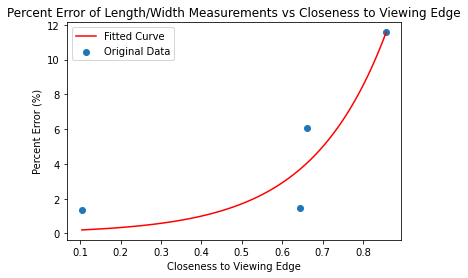

In [59]:
# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.xlabel('Closeness to Viewing Edge')
plt.ylabel('Percent Error (%)')
plt.title('Percent Error of Length/Width Measurements vs Closeness to Viewing Edge')
plt.show()

In [60]:
# Print the equation of the best-fitting curve
equation = f'y = {a_fit:.6f} * exp({b_fit:.6f} * x)'
print("Equation of the best-fitting curve:", equation)

print(b_fit)
print(a_fit)

Equation of the best-fitting curve: y = 0.117845 * exp(5.347099 * x)
5.34709859869689
0.11784473437619888
